## O Problema

Considere que você tenha um conjunto de $n$ observações $\{X_1, X_2, ..., X_n\}$ de uma variável $X$. Imagine que você queira saber se os valores de $X$ seguem uma distribuição normal. Como você pode fazer isso? Vamos discutir abaixo algumas das possibilidades.

### Os dados

Abaixo vou criar dois conjuntos de "pontos", um deles $Y$ proveniente de uma distribuição normal e outro $Z$ proveniente de uma distribuição beta. 

In [1]:
import random
import numpy as np
from scipy.stats import beta, norm

##### distribuição normal ####
mu = 10.   # média
dp = 2.    # desvio padrão
nn = 100   # número de pontos

Y = np.random.normal(loc=mu, scale=dp, size=nn)


##### distribuição beta ####
a = 2.
b = 5.
nb   = 120

Z = beta.rvs(a=a, b=b, size=nb)

Text(0, 0.5, 'f(x)')

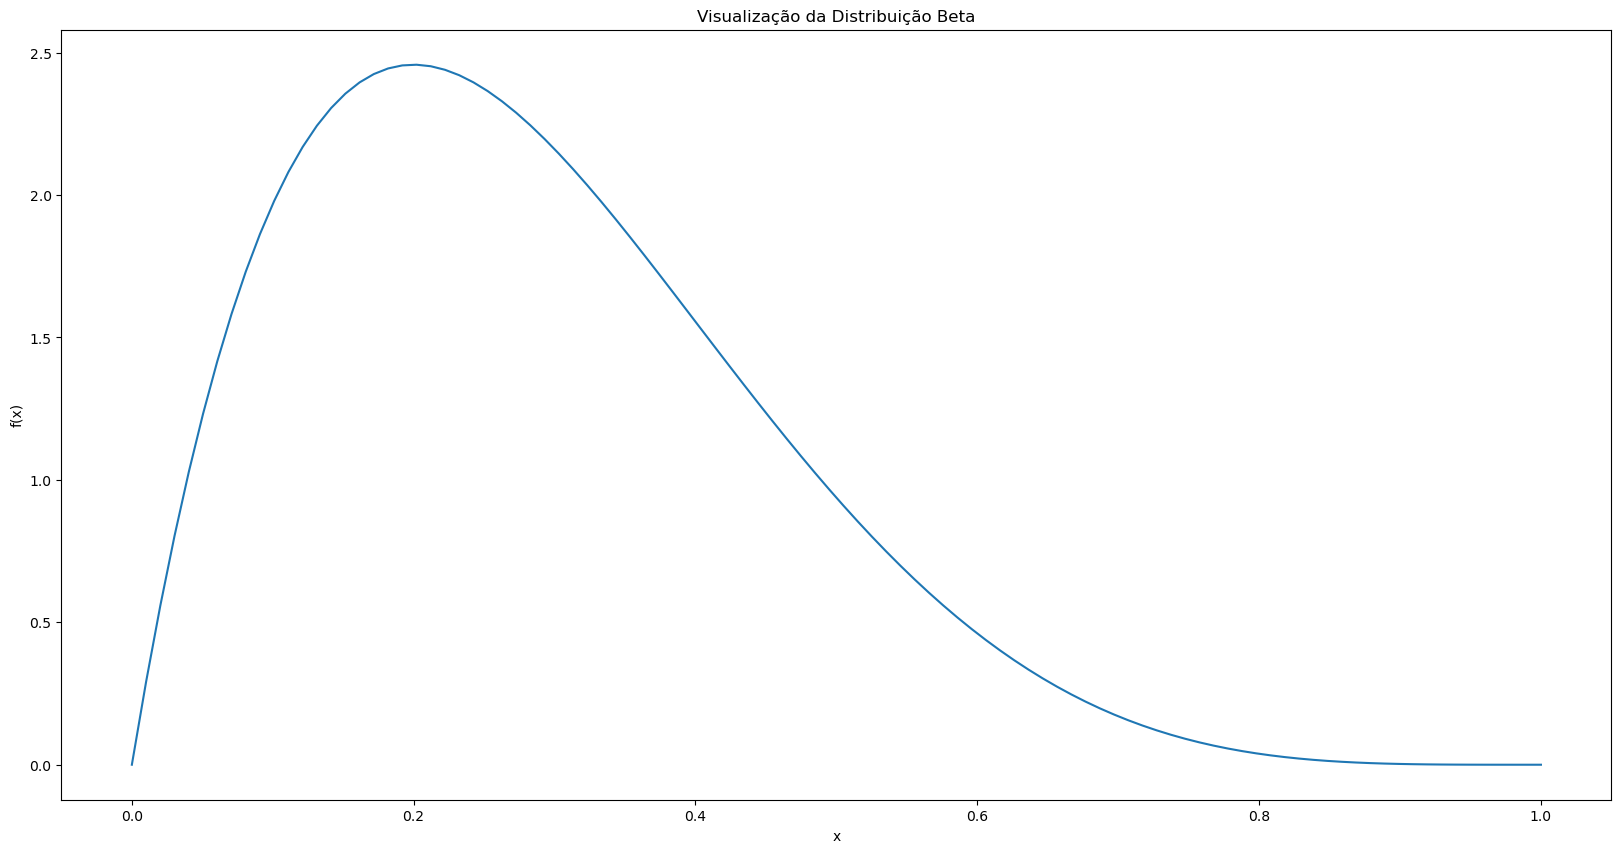

In [2]:
# visualizando a distribuição beta

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

# Conforme vimos, a média da distribuição Beta é 1/a, 
# então encolhemos valores até 2*(1/a) = 2/a, a fim de 
# visualizarmos boa parte desta distribuição
x = np.linspace(0,2/a,100)
fig, ax = plt.subplots()
plt.plot (x,beta.pdf(x,a,b))
ax.set_title('Visualização da Distribuição Beta')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

## Inspeção Visual

Uma das maneiras mais simples de se verificar se um conjunto de dados segue a distribuição normal é se fazer a comparação da **distribuição cumulativa** deste conjunto de dados com a distribuição cumulativa da distribuição normal. Para isso vamos realizar a transformação $Z$ em ambos os conjuntos de dados e comparar com a distribição normal.

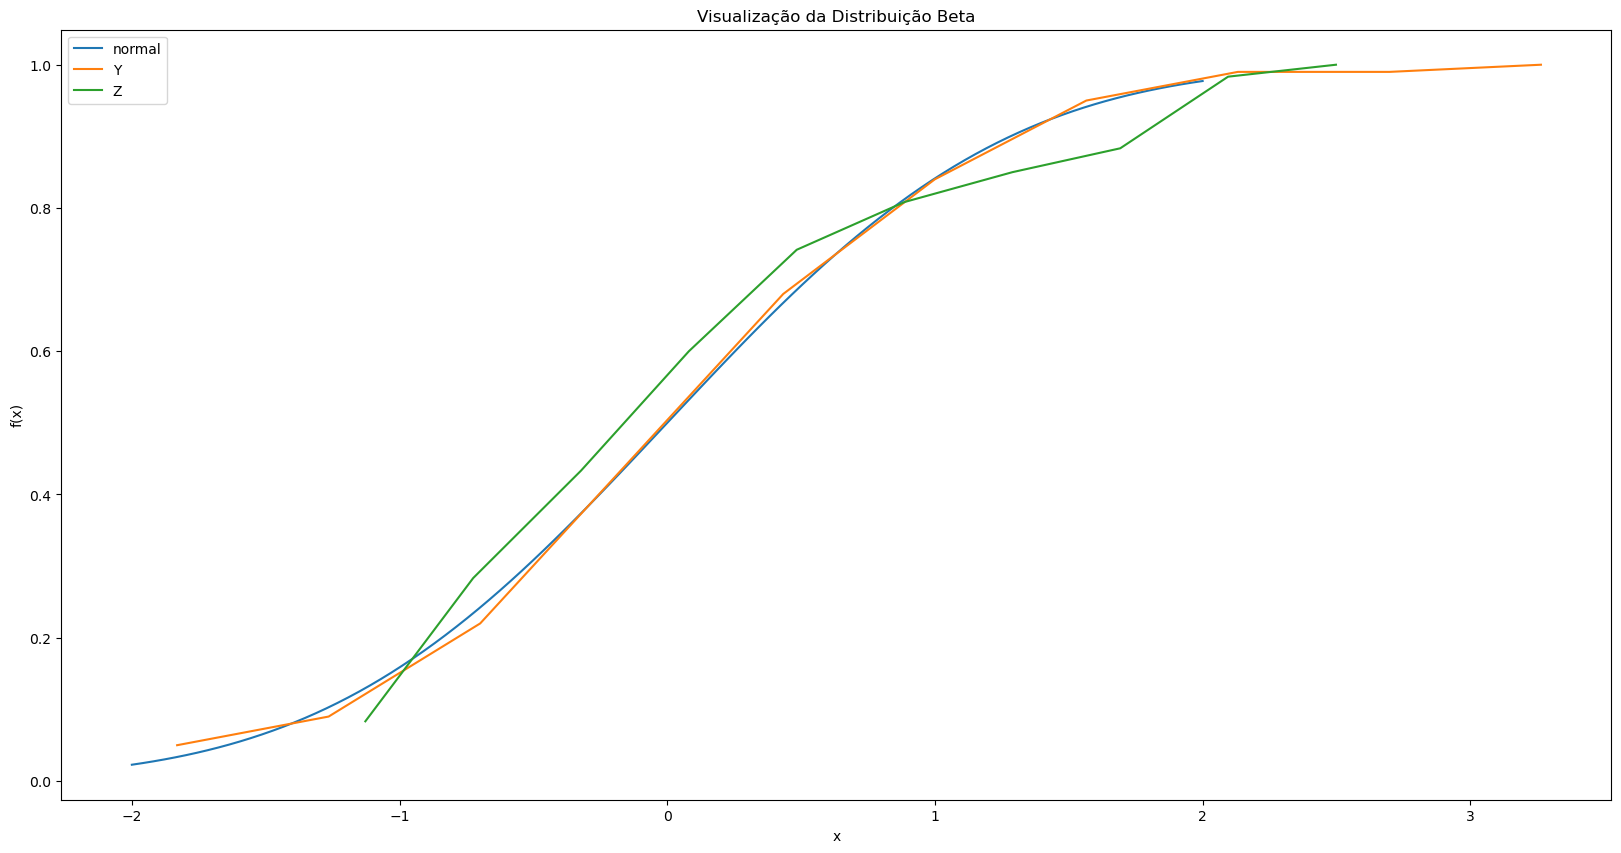

In [3]:
def cria_FDC(dados, nro_bins=10):
    # getting data of the histogram
    count, bins_count = np.histogram(dados, bins=nro_bins)
  
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
  
    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    
    return np.array([bins_count[1:], cdf])

yMedio = Y.mean(); yS = Y.std()
yZ = (Y-yMedio)/yS
yFDC = cria_FDC(yZ)

zMedio = Z.mean(); zS = Z.std()
zZ = (Z-zMedio)/zS
zFDC = cria_FDC(zZ)

x = np.linspace(-2,2,100)
F = norm.cdf(x)

fig, ax = plt.subplots()
plt.plot (x,F)
plt.plot(yFDC[0,:],yFDC[1,:])
plt.plot(zFDC[0,:],zFDC[1,:])

ax.set_title('Visualização da Distribuição Beta')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend(["normal", "Y", "Z"]);

## Teste de Kolmogorov-Smirnov

A base deste teste é verificar a distância vertical máxima entre a Distribuição Cumulativa da variável em questão em relação à Distribuição Cumulativa da Distribuição Normal. Quanto menor for o $p-valor$, maior é a tendência de rejeitarmos a hipótese nula, de que os dados vêm de uma distribuição normal.

In [8]:
import scipy

print ('Y = ',scipy.stats.kstest(yZ,scipy.stats.norm.cdf))
print ('Z = ', scipy.stats.kstest(zZ,scipy.stats.norm.cdf))

Y =  KstestResult(statistic=0.04342471194160569, pvalue=0.9875760227980352)
Z =  KstestResult(statistic=0.0969671794369501, pvalue=0.19599022544874603)


## Teste de Shapiro-Wilk

Este é outro teste de normalidade. Quanto menor for o $p-valor$, maior é a tendência de rejeitarmos a hipótese nula, de que os dados vêm de uma distribuição normal.

In [11]:
print ('Y = ', scipy.stats.shapiro(Y))
print ('Z = ', scipy.stats.shapiro(Z))

Y =  ShapiroResult(statistic=0.9919629096984863, pvalue=0.8185321092605591)
Z =  ShapiroResult(statistic=0.9312840700149536, pvalue=1.1581176295294426e-05)


## Teste de Anderson

Se o valor da estatística (*statistic*) for maior do que os valores críticos, então podemos rejeitar a hipótese nula de que os dados vieram da distribuição sendo comparada (*norm* no caso abaixo).

In [14]:
print ('Y = ', scipy.stats.anderson(Y, dist="norm"))
print ('Z = ', scipy.stats.anderson(Z, dist="norm"))

Y =  AndersonResult(statistic=0.1637999229609335, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Z =  AndersonResult(statistic=2.516530396078025, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.059]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
